# **Customer Analytics, Financial Analytics  & Time Series Data**

#**1. Customer Analytics**

##Why customer analytics?

## **Customer analytics**

It involves the processes and technologies used to understand customer behaviors and preferences, allowing businesses to make informed decisions.

It combines data collection, data processing, and analytical techniques to generate insights that drive business strategies and improve customer experiences.

##Key areas to consider while doing customer analytics

* **Descriptive analytics.** Gives you insight into past customer behavior.
* **Diagnostic analytics.** Helps you understand the “why” behind customer behavior.
* **Predictive analytics.** Helps you predict future customer behavior.
* **Prescriptive analytics**. Provides suggestions on how you can influence or address customer behavior.

###The importance of customer analytics
* Higher customer satisfaction and retention
* Lower lead generation and acquisition costs
* Increased sales and revenue
* Better brand awareness
* Increased user/customer engagement

##Key Concepts

1. **Customer Data**
* **Demographic Data**: Age, gender, income, education level.
* **Behavioral Data:** Purchase history, website interactions, social media activity.
* **Transactional Data:** Sales transactions, order history, payment methods.
* **Psychographic Data**: Interests, lifestyle, values, attitudes.


2. **Customer Segmentation**
* **Demographic Segmentation:** Based on demographic attributes like age, gender, and income.
* **Geographic Segmentation:** Based on geographic locations like country, region, or city.
* **Behavioral Segmentation:** Based on behaviors such as purchasing habits, brand loyalty, and product usage.
* **Psychographic Segmentation**: Based on psychological traits like lifestyle, values, and interests.


###How is customer segmentation helpful?
* Improved targeting and personalization
* Enhanced marketing strategies
* Better allocation of resources
* Increased customer satisfaction and loyalty



3. **Customer Churn Analysis**

This focuses on identifying customers who are likely to stop using a service or product.

**Techniques for Reducing Churn**

* Predictive modeling to identify at-risk customers
* Personalized retention strategies
* Enhanced customer support and engagement
* Continuous feedback collection and improvement


**ML Techniques**

* Regression Analysis: Identifies relationships between variables and predicts outcomes.
* Classification: Categorizes customers based on defined criteria (e.g., likely to churn).
* Clustering: Groups customers with similar characteristics.
* Time Series Analysis: Analyzes data points over time to identify trends and patterns.


## **Case study 3:** Telecom company

###**Customer behavior:** Customer Churn analytics


##Churn prediction

Can you predict when an airtime customer will move to another provider?


##**Description**
This case study is applied to an African telecommunications company that provides customers with airtime and mobile data bundles.


**The Objective**

To develop a machine learning model to predict the likelihood of each customer “churning,” i.e. becoming inactive and not making any transactions for 90 days.

Let's develop a predictive model that determines the likelihood for a customer to churn - to stop purchasing airtime and data from the client.

**The solution**

Is to help this "telecom company" to better serve their customers by understanding which customers are at risk of leaving.

The data describes 2.5 million clients.

###**About the dataset**

* **VariableDefinitions.CSV**: This file describes each variable.

* **Train.CSV:** Contains information about 1 million customers. There is a column called CHURN that indicates if a client churned or did not churn. This is the target. You must estimate the likelihood that these clients churned. You will use this file to train your model.

* **Test.CSV:** Is similar to train, but without the Churn column. You will use this file to test your model on.


**Evaluation**

The error metric for this competition is the F1 score, which ranges from 0 (total failure) to 1 (perfect score). Hence, the closer your score is to 1, the better your model.

* **F1 Score:** A performance score that combines both precision and recall. It is a harmonic mean of these two variables. Formula is given as: 2*Precision*Recall/(Precision + Recall)

* **Precision:** This is an indicator of the number of items correctly identified as positive out of total items identified as positive. Formula is given as: TP/(TP+FP)

* **Recall / Sensitivity / True Positive Rate (TPR):** This is an indicator of the number of items correctly identified as positive out of total actual positives. Formula is given as: TP/(TP+FN)

**Where:**

TP=True Positive

FP=False Positive

TN=True Negative

FN=False Negative

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
import pandas as pd

# First Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# locate the file path
file_path_Train = '/content/drive/My Drive/Colab Notebooks/Churn prediction/Train.csv'
file_path_Test = '/content/drive/My Drive/Colab Notebooks/Churn prediction/Test.csv'
file_path_Variables = '/content/drive/My Drive/Colab Notebooks/Churn prediction/VariableDefinitions.csv'

In [4]:
#Read the CSV files
Train = pd.read_csv(file_path_Train)
Test = pd.read_csv(file_path_Test)
Variables = pd.read_csv(file_path_Variables)

In [5]:
Train.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,7ee9e11e342e27c70455960acc80d3f91c1286d1,DAKAR,K > 24 month,20000.00,47.00,21602.00,7201.00,52.00,8835.00,3391.00,396.00,185.00,NaN,NaN,NO,62,On net 200F=Unlimited _call24H,30.00,0
1,50443f42bdc92b10388fc56e520e4421a5fa655c,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,3,NaN,NaN,0
2,da90b5c1a9b204c186079f89969aa01cb03c91b2,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN,0
3,364ec1b424cdc64c25441a444a16930289a0051e,SAINT-LOUIS,K > 24 month,7900.00,19.00,7896.00,2632.00,25.00,9385.00,27.00,46.00,20.00,NaN,2.00,NO,61,"Data:490F=1GB,7d",7.00,0
4,d5a5247005bc6d41d3d99f4ef312ebb5f640f2cb,DAKAR,K > 24 month,12350.00,21.00,12351.00,4117.00,29.00,9360.00,66.00,102.00,34.00,NaN,NaN,NO,56,All-net 500F=2000F;5d,11.00,0


In [6]:
Test.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,51fe4c3347db1f8571d18ac03f716c41acee30a4,MATAM,I 18-21 month,2500.00,5.00,2500.00,833.00,5.00,0.00,64.00,70.00,NaN,NaN,NaN,NO,35,All-net 500F=2000F;5d,5.00
1,5ad5d67c175bce107cc97b98c4e37dcc38aa7f3e,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2,NaN,NaN
2,5a4db591c953a8d8f373877fad37aaf4268899a1,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NO,22,NaN,NaN
3,8bf9b4d8880aeba1c9a0da48be78f12e629be37c,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,6,NaN,NaN
4,c7cdf2af01e9fa95bf498b68c122aa4b9a8d10df,SAINT-LOUIS,K > 24 month,5100.00,7.00,5637.00,1879.00,15.00,7783.00,30.00,24.00,0.00,0.00,NaN,NO,60,"Data:1000F=2GB,30d",4.00


In [7]:
Variables

,Variable Definitions,Unnamed: 1,Unnamed: 2
0,NaN,French,English
1,NaN,Le dataset churn comprend 19 variables dont 15...,The churn dataset includes 19 variables includ...
2,user_id,NaN,NaN
3,REGION,la localité de chaque client,the location of each client
4,TENURE,la durée dans le reseau,duration in the network
5,MONTANT,montant de recharge,top-up amount
6,FREQUENCE_RECH,nombre de fois que le client a fait une recharge,number of times the customer refilled
7,REVENUE,revenu mensuel de chaque client,monthly income of each client
8,ARPU_SEGMENT,revenu sur 90 jours/3,income over 90 days / 3
9,FREQUENCE,nombre de fois que client à fait un revenu,number of times the client has made an income


#**2. Financial Analytics**

##**Why financial analytics?**

**Financial analytics** is a discipline that combines finance and data analytics to improve decision-making processes.

It involves the use of statistical and quantitative methods to analyze financial data in order to identify patterns and trends that can help businesses make better financial decisions.

**Applications of Financial analytics within finance;**


* **Risk management:** to identify potential risks and develop strategies to mitigate them
* **Asset management:**
* **Financial planning:** to develop strategies e.g. retirement planning, tax planning, and estate planning.

**Data Analytics Vz Financial Analytics:**

**Data analytics** is the process of collecting, processing, and analyzing large sets of data to gain insights and make informed decisions.

**Financial analytics** is a subset of data analytics that focuses specifically on financial data.

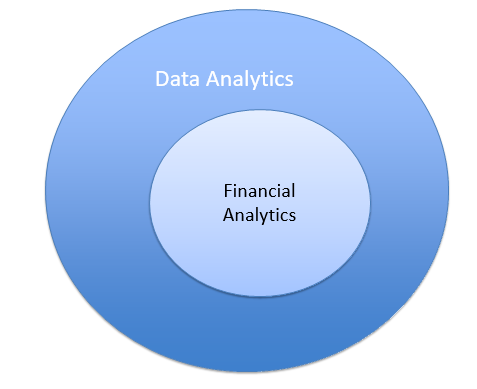


**Techniques in Financial Analytics:**

* **Regression analysis** is used to identify the relationship between two or more variables.

* **Time series analysis** is used to analyze data over a period of time in order to identify trends and patterns.

* **Monte Carlo simulations** are used to model the potential outcomes of various financial scenarios.

**Financial Analytics Tools:**

* **Excel** is a widely used tool for financial analytics, but it has some limitations in terms of its statistical capabilities.

* **R** and **Python** are programming languages that are widely used in data analytics, including financial analytics.

* **MATLAB** is a numerical computing environment that is widely used in financial engineering.


##**Case Study 4:** Mobile Money and Financial Inclusion in Tanzania

##Description

###**Goal**

Predict who is more likely to use mobile money or other financial services

**Details**

Only 16.7% of the population in Tanzania has a bank account. But an additional 48.6% of Tanzanians who don’t have a bank account do have other types of formal financial services, primarily mobile money.

For people who have been traditionally excluded from the formal financial system in Africa and other developing markets, mobile money has become an important entry point to financial inclusion. While mobile money is a tool for transferring money among people and businesses/other institutions, it is increasingly becoming a platform for people to access a broad range of financial services, including savings, credit, and insurance.

**The objective**

To create a machine learning model to predict which individuals are most likely to use mobile money and other financial services (savings, credit, and insurance).

This model can help mobile money providers target new clients and markets across Tanzania more effectively, and also help financial services providers cross-sell other financial services (savings, credit, and insurance) to the existing mobile money customer base.


##**About the dataset**

###Financial Inclusion Survey Data

The main dataset contains demographic information and what financial services are used by approximately 10,000 individuals across Tanzania. This data was extracted from the FSDT Finscope 2017. More about the Finscope survey [here](https://www.fsdt.or.tz/wp-content/uploads/2017/09/Finscope.pdf).

The data have been split between training and test sets. The test set contains all information about each individual except for what types of financial services he or she uses.


Your goal is to accurately classify each individual into four mutually exclusive categories:


 * **No_financial_services:** Individuals who do not use mobile money, do not save, do not have credit, and do not have insurance
 * **Other_only:** Individuals who do not use mobile money, but do use at least one of the other financial services (savings, credit, insurance)
 * **Mm_only:** Individuals who use mobile money only
 * **Mm_plus:** Individuals who use mobile money and also use at least one of the other financial services (savings, credit, insurance)

###Financial Access Map

This dataset is the geospatial mapping of all cash outlets in Tanzania in 2012. Cash outlets in this case included commercial banks, community banks, ATMs, microfinance institutions, mobile money agents, bus stations and post offices. This data was collected by FSDT. More about this dataset [here](https://www.fsdt.or.tz//wp-content/uploads/2015/12/GIS-Map-FinAccess-1.pdf).

**ArcGIS & Africa GeoPortal**

To enrich and validate your models with location and spatial context you have access to a number of additional capabilities via Esri’s ArcGIS Technology and The Africa GeoPortal.

* To create additional features for individuals in the survey dataset, you can map the location of the survey respondents using the GPS coordinates provided per individual (note that these are not exact GPS coordinates of the respondent for privacy reasons, but in the approximate region).

* You can overlay the respondents’ locations with the Access Map dataset provided and other contextual layers available on The Africa GeoPortal, these include background imagery, basemaps, regional demographic data and many more.

* Users can evaluate and validate ingoing and outcoming spatial data by using ArcGIS Online via Africa GeoPortal.

* You can leverage the power of ArcGIS capabilities and Jupyter Notebooks

**Here is some useful information on how to achieve the above:**

* To access the ArcGIS Technology, free accounts can be made [here](https://www.africageoportal.com/). Further instructions can be found [here](https://www.africageoportal.com/pages/sign-up)

* CSVs with location tags in them such as addresses or coordinates can be quickly displayed via drag & drop – how to is [here](https://doc.arcgis.com/en/arcgis-online/reference/add-layers.htm)

* Other useful datasets such as imagery, population data covering Tanzania can also be accessed for free via Africa GeoPortal – see [here](http://www.africageoportal.com/pages/africa-living-atlas)

* For data scientists, integration between ArcGIS and Jupyiter Notebooks may be of great value. More info [here](https://www.esri.com/arcgis-blog/products/arcgis-enterprise/analytics/introducing-arcgis-notebooks/), tools here and set up [here](https://developers.arcgis.com/python/guide/install-and-set-up/)

###**Dataset files**

* **train.csv** is the dataset that you will use to train your model. This dataset includes 7,094 randomly selected individuals.

* **test.csv** is the dataset to which you will apply your model to test how well it performs. Use your model and this dataset to predict in which of the four classifications the person is likely in (no financial services, mobile money only, other services only, or both mobile money and other financial services). The test set contains 2,365 individuals. This dataset includes the same fields as train.csv except for the last FIVE columns. Note that the target is mobile_money_classification, which is actually just a composite of mobile_money, savings, borrowing, and insurance.


* **Variable Codebook** provides definitions of the variables found in test.csv and train.csv

* **FSDT_FinAccessMapping.zip** provides GPS coordinates of all the "cash outlets" in Tanzania (in 2013), i.e. commercial banks, community banks, ATMs, microfinance institutions, mobile money agents, bus stations and post offices.

##**Evaluation**
The evaluation metric is the **Log Loss**.

In [15]:
# locate the file path
file_path_Train = '/content/drive/My Drive/Colab Notebooks/Financial Analytics/training.csv'
file_path_Test = '/content/drive/My Drive/Colab Notebooks/Financial Analytics/test.csv'
file_path_Variables = '/content/drive/My Drive/Colab Notebooks/Financial Analytics/Variable_Codebook.docx'

In [16]:
#Read the CSV files
Training = pd.read_csv(file_path_Train)
Testing = pd.read_csv(file_path_Test)

In [18]:
Training.head()

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q17,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
0,5086,98,2,3,1,1,2,2,0,0,...,-1,4,4,-4.46,29.81,0,0,0,0,0
1,1258,40,1,1,3,5,1,1,1,0,...,4,1,4,-6.18,39.24,1,1,1,0,3
2,331,18,2,4,6,3,2,1,0,0,...,-1,1,1,-6.83,37.65,1,0,0,0,2
3,6729,50,1,1,3,1,1,1,0,0,...,-1,1,4,-3.37,35.81,1,0,1,0,3
4,8671,34,1,1,1,1,2,1,0,1,...,-1,1,4,-7.18,31.04,1,1,0,1,3


In [19]:
Training.shape

(7094, 37)

In [20]:
Testing.head()

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Latitude,Longitude
0,2352,30,2,1,3,6,2,1,0,0,...,1,6,1,4,5,-1,1,4,-2.60,32.91
1,8208,53,1,1,3,1,2,1,0,1,...,2,-1,1,4,1,-1,1,4,-1.78,34.06
2,2785,23,2,1,3,5,1,1,0,0,...,1,4,1,4,1,-1,1,1,-1.85,31.54
3,2967,30,2,3,3,4,1,2,0,1,...,2,-1,2,-1,1,-1,1,4,-1.24,34.23
4,1697,28,2,1,5,4,2,1,0,0,...,1,4,1,6,4,3,1,2,-7.78,35.69


In [22]:
Testing.shape

(2365, 32)

In [23]:
!pip install python-docx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 5.1 MB/s eta 0:00:00


In [25]:
from docx import Document

In [52]:
Variables_df = Document(file_path_Variables)
for para in Variables_df.paragraphs:
    print(para.text)

Code book for mobile money dataset



In [53]:
Training.describe()

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q17,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
count,7094.00,7094.00,7094.00,7094.00,7094.00,7094.00,7094.00,7094.00,7094.00,7094.00,...,7094.00,7094.00,7094.00,7094.00,7094.00,7094.00,7094.00,7094.00,7094.00,7094.00
mean,4742.63,38.24,1.56,1.79,3.06,2.55,1.84,1.40,0.06,0.63,...,-0.43,1.86,3.16,-6.03,35.35,0.55,0.46,0.43,0.15,1.80
std,2731.12,16.33,0.50,1.17,1.56,1.53,0.37,0.49,0.24,0.48,...,1.49,1.35,1.32,2.72,2.90,0.50,0.50,0.50,0.36,1.20
min,1.00,16.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,...,-1.00,1.00,1.00,-11.47,29.64,0.00,0.00,0.00,0.00,0.00
25%,2397.25,25.00,1.00,1.00,2.00,1.00,2.00,1.00,0.00,0.00,...,-1.00,1.00,2.00,-8.28,32.94,0.00,0.00,0.00,0.00,1.00
50%,4744.50,35.00,2.00,1.00,3.00,3.00,2.00,1.00,0.00,1.00,...,-1.00,1.00,4.00,-6.09,35.07,1.00,0.00,0.00,0.00,2.00
75%,7105.00,48.00,2.00,3.00,3.00,4.00,2.00,2.00,0.00,1.00,...,-1.00,4.00,4.00,-3.52,38.35,1.00,1.00,1.00,0.00,3.00
max,9459.00,100.00,2.00,4.00,8.00,6.00,2.00,2.00,1.00,1.00,...,5.00,5.00,5.00,-1.08,40.26,1.00,1.00,1.00,1.00,3.00


#**3. Time Series**

**A time series** is data ordered by time, typically at regular time intervals.

**Four aspects** of a time series include: **trend, seasons, cycles** and **irregular component**.

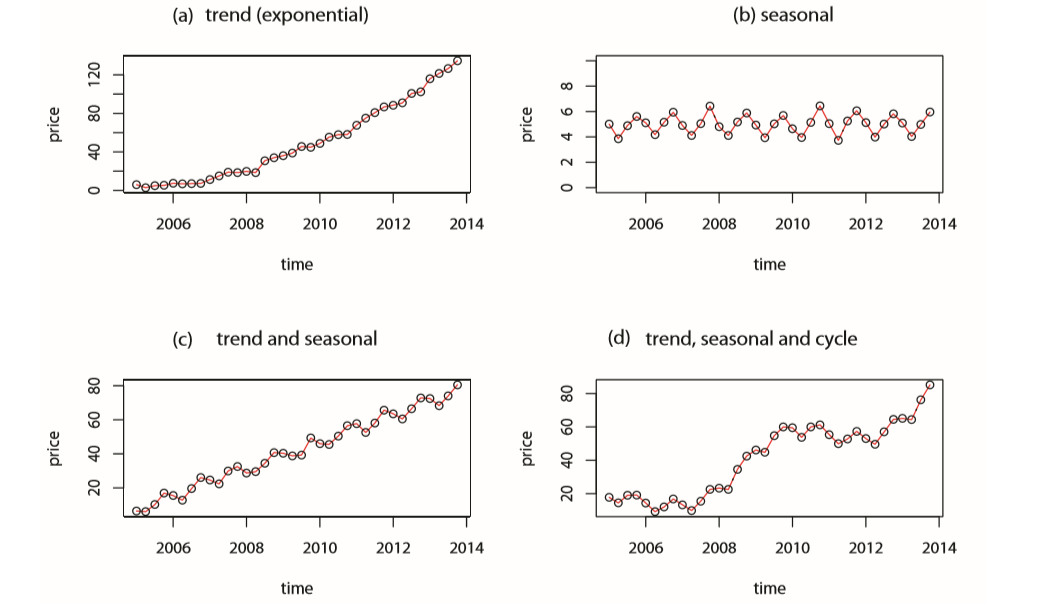




The aspects of Time Series:
1. **Trend**: A long-term upward or downward movement in the data. **e.g.** Increasing sales revenue over several years.

2. **Seasonality:** Regular and predictable patterns or cycles in the data that repeat over a specific period, such as daily, monthly, or yearly. **e.g**  Higher ice cream sales during the summer months.

3. **Cyclic Patterns:** Fluctuations in the data that occur at irregular intervals, often influenced by economic or business cycles. **e.g.** Economic recessions and expansions.

4. **Irregular Variations (Noise):** Random or unpredictable fluctuations in the data that do not follow a pattern. **e.g.** Sudden spikes in demand due to a viral marketing campaign.

5. **Stationarity:** A stationary time series has statistical properties, such as mean and variance, that do not change over time. **e.g.** Stock returns with a constant average and consistent variance over time.


**Applications of Time Series Analysis:**

1. **Forecasting:** Predicting future values based on historical.

2. **Trend Analysis:** Identifying long-term movements in the data.

3. **Seasonal Adjustment:** Removing seasonal effects to understand the underlying trends.

4. **Anomaly Detection:** Identifying unexpected or unusual data points that do not fit the established patterns.


5. **Economic Analysis:** Analyzing economic indicators to understand economic conditions and inform policy decisions.


##**Case Study 5:** Cryptocurrency Closing Price Prediction

Can you predict the closing price for a cryptocurrency?

**Description**

After the boom and bust of cryptocurrencies’ prices in recent years, cryptocurrencies have been increasingly regarded as an investment asset. Because of their highly volatile nature, there is a need for good predictions on which to base investment decisions. Different existing studies have leveraged machine learning for more accurate cryptocurrency price prediction. We are interested in applying different modeling techniques to samples with different data structures (qualitative and quantitative data) and dimensional features to achieve an optimization in price prediction.

Using the trading time series of a cryptocurrency’s price, in addition to a set of qualitative features (news, social impact, Twitter, Reddit, social media sentiment analysis), we would like to build a model that forecasts a cryptocurrency’s price. In this case study, we are focusing on the trading time series and how we can optimize currency forecasting. We will predict future cryptocurrency prices.

There are many factors and constraints that can be taken into consideration when increasing or decreasing cryptocurrency prices by the different stakeholders. These factors can be directly seen in newspapers, related websites or social media, for that including these features in the model can add value and predict more accurate cryptocurrency prices.

The target value is the actual price. We have data extracted in an interval of 1h for a period of one year (from 1st of March 2020 to 1st of March 2021). We are interested to predict the values of cryptocurrency prices in specific timestamps that we have in the validation file.

There can be different ways to solve this problem. One can think about using the prices from the different trading platforms as the initial data (the provided dataset) and build forecasting models and/or Neural Networks ones.



**The goal**

To have predictions that are accurate in a way that it’s mostly similar to the original validation file, to bypass the given threshold evaluation result, and come up with something that is more accurate.



**About the dataset**

This is a comprehensive dataset that captures the prices of a cryptocurrency along with the various features including social media attributes, trading attributes and time related attributes that were noted on an hourly basis during several months and that contribute directly or indirectly to the cryptocurrency volatile prices change.

**Variable definitions**

* **asset_id:**  An asset ID. We refer to all supported cryptocurrencies as assets
* **open:**  Open price for the time period
* **close:** Close price for the time period
* **high:**  Highest price of the time period
* **low:** Lowest price of the time period
* **volume:** Number of tweets
* **market_cap:** Total available supply multiplied by the current price in USD
* **url_shares:** Every time an identified relevant URL is shared within relevant social posts that contain relevant terms
* **unique_url_shares:** Number of unique url shares posted and collected on social media
* **reddit_posts:** Number of latest Reddit posts for supported coins
* **reddit_posts_score:** Reddit Karma score on individual posts
* **reddit_comments:** Comments on Reddit that contain relevant terms
* **Reddit_comments_score:** Reddit Karma score on comments
* **tweets:** Number of crypto-specific tweets based on tuned search and filtering criteria
* **tweet_spam:** Number of tweets classified as spam
* **tweet_followers:** Number of followers on selected tweets
* **tweet_quotes:** Number of quotes on selected tweets
* **tweet_retweets:** Number of retweets of selected tweets
* **tweet_replies:** Number of replies on selected tweets
* **tweet_favorites:** Number of likes on an individual social post that contains a relevant term
* **tweet_sentiment1:** Number of tweets which has a sentiment of “very bullish”
* **tweet_sentiment2:** Number of tweets which has a sentiment of “bullish”
* **tweet_sentiment3:** Number of tweets which has a sentiment of “neutral”
* **tweet_sentiment4:** Number of tweets which has a sentiment of “bearish”
* **tweet_sentiment5:** Number of tweets which has a sentiment of “very bearish”
* **tweet_sentiment_impact1:** “Very bearish” sentiment impact
* **tweet_sentiment_impact2:** “Bearish” sentiment impact
* **tweet_sentiment_impact3:** “Neutral” sentiment impact
* **tweet_sentiment_impact4:** “Bullish” sentiment impact
* **tweet_sentiment_impact5:** “Very bullish” sentiment impact
* **social_score:** Sum of followers, retweets, likes, reddit karma etc of social posts collected
* **average_sentiment:** The average score of sentiments, an indicator of the general sentiment being spread about a coin
* **news:** Number of news articles for supported coins
* **price_score:** A score we derive from a moving average that gives the coin some indication of an upward or downward based solely on the market value
* **social_impact_score:** A score of the volume/interaction/impact of social to give a sense of the size of the market or awareness of the coin
* **correlation_rank:** The algorithm that determines the correlation of our social data to the coin price/volume
* **galaxy_score:** An indicator of how well a coin is doing
* **volatility:** Volatility indicator
* **market_cap_rank:** The rank based on the total available supply multiplied by the current price in USD
* **percent_change_24h_rank:** The rank based on the percent change in price since 24 hours ago
* **volume_24h_rank:** The rank based on volume in the last 24 hours
* **social_volume_24h_rank:** The rank based on the number of social posts that contain relevant terms in the last 24 hours
* **social_score_24h_rank:** The rank based on the sum of followers, retweets, likes, reddit karma etc of social posts collected in the last 24 hours
* **medium:** Number of Medium articles for supported coins
* **youtube:** Number of videos with description that contains relevant terms
* **social_volume:** Number of social posts that contain relevant terms
* **price_btc:** Exchange rate with another coin
* **market_cap_global:** Total available supply multiplied by the current price in USD
* **percent_change_24h:** Percent change in price since 24 hours ago

**Test.csv:** Contains the target. This is the dataset that you will use to train your model.

**Test.csv**Resembles Train.csv but without the target-related columns. This is the dataset on which you will apply your model to.

**Evaluation**

The evaluation metric is [Root Mean Squared Error](https://zindi.africa/learn/zindi-error-metric-series-what-is-root-mean-square-error-rmse#:~:text=Root%20Mean%20Squared%20Error%20or,want%20the%20model%20to%20achieve.).

In [9]:
# locate the file path
file_path_Train_3 = '/content/drive/My Drive/Colab Notebooks/Time series/Train.csv'
file_path_Test_3 = '/content/drive/My Drive/Colab Notebooks/Time series/Test.csv'

In [10]:
#Read the CSV files
Train_3 = pd.read_csv(file_path_Train_3)
Test_3 = pd.read_csv(file_path_Test_3)

In [11]:
Train_3.head()

,id,asset_id,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,...,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global,close
0,ID_322qz6,1,9422.85,9428.49,9422.85,713198620.00,173763453624.00,1689.00,817.00,55.00,...,606.00,2.00,1.00,1.00,2.00,5.00,4422,1.43,281806567507.00,9428.28
1,ID_3239o9,1,7985.36,7992.06,7967.57,400475518.00,142694202230.96,920.00,544.00,20.00,...,NaN,NaN,NaN,NaN,NaN,NaN,2159,-2.46,212689713284.66,7967.57
2,ID_323J9k,1,49202.03,49394.59,49068.06,3017728869.00,916697653223.00,1446.00,975.00,72.00,...,692.00,3.00,1.00,1.00,NaN,NaN,10602,4.94,1530711784042.00,49120.74
3,ID_323y5P,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.00,...,NaN,NaN,NaN,NaN,NaN,NaN,285,NaN,NaN,NaN
4,ID_324kJH,1,10535.74,10535.74,10384.80,1150053380.00,192118271222.00,1012.00,638.00,24.00,...,749.00,2.00,1.00,1.00,NaN,2.00,3996,2.61,338692529390.00,10384.80


In [13]:
Train_3.shape

(12632, 49)

In [12]:
Test_3.head()

,id,asset_id,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,...,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global
0,ID_323Sn2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN
1,ID_325SNW,1,11335.06,11351.69,11335.06,1064152175.00,210146290107.00,1664.00,1045.00,64.00,...,1.00,711.00,2.00,1.00,1.00,1.00,1.00,7245,-0.56,363105229621.00
2,ID_325uzE,1,6322.56,6328.36,6294.71,1516268198.00,115386211100.00,397.00,255.00,11.00,...,1.00,715.00,2.00,1.00,1.00,NaN,NaN,2702,1.69,177107493664.00
3,ID_328qCx,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225,NaN,NaN
4,ID_3293uJ,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59,NaN,NaN


In [14]:
Test_3.shape

(6222, 48)